In [2]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
import joblib

In [3]:
le = preprocessing.LabelEncoder()

# Import data and preprocess
school_data = pd.read_csv('school profiles.csv')
for column_name in school_data.columns:
        if school_data[column_name].dtype == object:
            school_data[column_name] = le.fit_transform(school_data[column_name])
        else:
            pass

In [4]:
X = school_data.drop(columns=['School'])
y = school_data['School']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
# score = accuracy_score(y_test, predictions)

In [5]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [6]:
model.predict_proba(X_test)

array([[0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 1.

In [7]:
accuracy_score(y_test, predictions)

1.0

In [8]:
confusion_matrix(y_test, predictions)

array([[ 1,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0, 32]], dtype=int64)

In [9]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        32

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



In [10]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict([[1, 9, 5]])
le.inverse_transform(predictions)

C:\Users\wowha\OneDrive\Desktop\SeeKampus\venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Laguna College Of Business And Arts'], dtype=object)

In [11]:
feature_names = X.columns
feature_names

Index(['Course', 'Tuition Fee', 'Location'], dtype='object')

In [12]:
model.feature_importances_

array([0.02307974, 0.10040791, 0.87651235])

In [13]:
feature_importance = pd.DataFrame(model.feature_importances_, index = feature_names)

<AxesSubplot: >

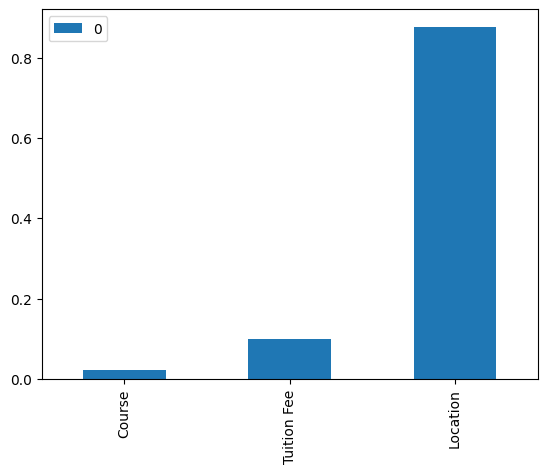

In [14]:
feature_importance.head(10).plot(kind='bar')

In [15]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(model,
                    feature_names=feature_names,
                    class_names=le.classes,
                    filled=True,
                     fontsize=12)



AttributeError: 'LabelEncoder' object has no attribute 'classes'

<Figure size 2500x2000 with 0 Axes>

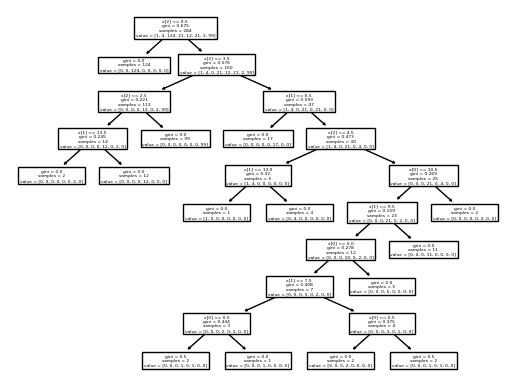

In [16]:
# Import decision tree plot function
from sklearn.tree import plot_tree

# Plot decision tree
plot_tree(model)

# Show plot
plt.show()


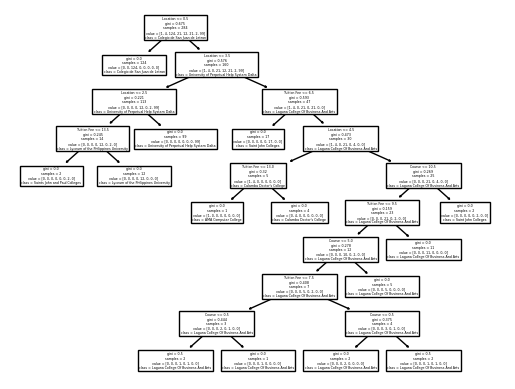

In [18]:
# Plot decision tree with feature and class names
plot_tree(model, feature_names=X.columns, class_names=le.classes_)

# Show plot
plt.show()


In [19]:
school_data['School'] = school_data['School'].astype(int)

 # Import libraries
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

# Export decision tree to Graphviz
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns,
                class_names=le.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Create plot
Image(graph.create_png())


InvocationException: GraphViz's executables not found

[Text(0.3333333333333333, 0.95, 'x[2] <= 0.5\ngini = 0.675\nsamples = 284\nvalue = [1, 4, 124, 21, 12, 21, 2, 99]'),
 Text(0.25, 0.85, 'gini = 0.0\nsamples = 124\nvalue = [0, 0, 124, 0, 0, 0, 0, 0]'),
 Text(0.4166666666666667, 0.85, 'x[2] <= 3.5\ngini = 0.576\nsamples = 160\nvalue = [1, 4, 0, 21, 12, 21, 2, 99]'),
 Text(0.25, 0.75, 'x[2] <= 2.5\ngini = 0.221\nsamples = 113\nvalue = [0, 0, 0, 0, 12, 0, 2, 99]'),
 Text(0.16666666666666666, 0.65, 'x[1] <= 13.5\ngini = 0.245\nsamples = 14\nvalue = [0, 0, 0, 0, 12, 0, 2, 0]'),
 Text(0.08333333333333333, 0.55, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 2, 0]'),
 Text(0.25, 0.55, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 0, 12, 0, 0, 0]'),
 Text(0.3333333333333333, 0.65, 'gini = 0.0\nsamples = 99\nvalue = [0, 0, 0, 0, 0, 0, 0, 99]'),
 Text(0.5833333333333334, 0.75, 'x[1] <= 6.5\ngini = 0.593\nsamples = 47\nvalue = [1, 4, 0, 21, 0, 21, 0, 0]'),
 Text(0.5, 0.65, 'gini = 0.0\nsamples = 17\nvalue = [0, 0, 0, 0, 0, 17, 0, 0]'),
 Text(

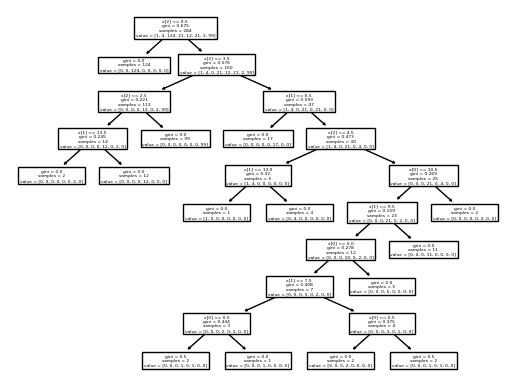

In [20]:
from sklearn import tree
tree.plot_tree(model)

In [26]:
tree.export_graphviz(model, out_file='test_2.dot',
                     feature_names=X.columns,
                     class_names=le.classes_,
                     filled=True,
                     rounded=True,
                     label='all')